In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KernelDensity
%matplotlib inline  

In [3]:
def generate_data(data_count, n = 1):
    np.random.seed(0)
    mu1 = [3, 3]
    mu2 = [8, 8]
    cov =  n * np.eye(2)

    X = np.concatenate([np.random.multivariate_normal(mu1, cov, data_count),
                        np.random.multivariate_normal(mu2, cov, data_count)])

    #classes
    y = np.zeros(2*data_count)
    y[data_count:] = 1
    return X, y

In [4]:
X,y = generate_data(300)

In [5]:
# fig, ax = plt.subplots(figsize=(12, 12))
# ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend1)

In [6]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [7]:
X_test, y_test = generate_data(30)
predicted= clf.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[5.49022646e-07 5.88686222e-07 6.30968200e-07 ... 1.23731785e-35
 1.03308813e-35 8.62230644e-36]
[1.38684907e-38 1.69131839e-38 2.06169134e-38 ... 3.53403530e-08
 3.22114200e-08 2.93461382e-08]


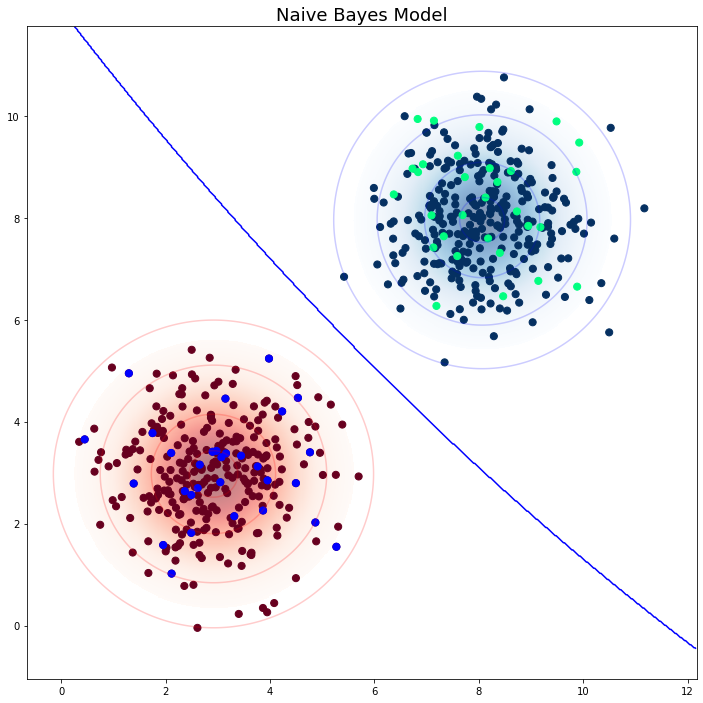

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=18)

h = 0.02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xg = np.linspace(x_min, x_max, 30)
yg = np.linspace(y_min, y_max, 30)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    print(P)
#kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X,y)
#P = kde.score_samples(X)
    
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,[0.5], colors='b')


#predicted points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')


x_t_min, x_t_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_t_min, y_t_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xg_t = np.linspace(x_t_min, x_t_max, 30)
yg_t = np.linspace(y_t_min, y_t_max, 30)

xx_t, yy_t = np.meshgrid(np.arange(x_t_min, x_t_max, h),
                     np.arange(y_t_min, y_t_max, h))

In [17]:
print("Means(MO):\n", clf.theta_)
print("Standard deviations:\n", clf.sigma_)

Means(MO):
 [[2.91453549 2.97556345]
 [8.06197435 7.96112284]]
Standard deviations:
 [[1.02179865 0.99037422]
 [0.87781228 0.92512679]]


In [18]:
from sklearn.neighbors import KernelDensity

In [19]:
kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X,y)

In [20]:
KDE = kde.score_samples(X)

In [21]:
import scipy.stats as st


-0.7421869391254328 12.253989474418871 -1.1266928716820777 11.839904930903733
10000


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

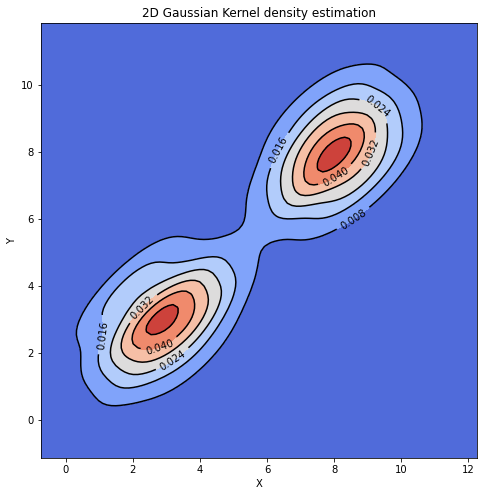

In [22]:
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# k = np.reshape()
print(len(kernel(positions)))

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')